## Credit Card Customer Segmentation - Clustering

Credit Card customer Segmentation is simply grouping customers with similar characteristics. These characteristics include number of visits to bank, total visit online and taotal calls made. Clustering is an efficient technique used for customer segmentation.

Clustering algorithms include the K-means algorithm, hierarchical clustering, DBSCAN. In this project, the k-means clustering algorithm has been applied in customer segmentation. 

K-means is a clustering algorithm based on the principle of partition. The letter k represents the number of clusters chosen. It is the most common centroid-based algorithm. 

### 1. Importing the libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from tabulate import tabulate

### 2. Uploading dataframe

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')

In [3]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### 3. Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Here, we will perform EDA on the numerical columns of the dataset - Average Credit Limit, Total Credit Cards, Total Bank Visits, Total Online Visits, Total Calls Made.

In [61]:
# checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
 7   label                660 non-null    int32
dtypes: int32(1), int64(7)
memory usage: 38.8 KB


In [5]:
# checking the null values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
# checking the distribution of dataset
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [7]:
# checking the shape
df.shape

(660, 7)

In [8]:
# checking unique values for customer key column
len(df['Customer Key'].unique())

655

In [9]:
# checking unique values for Avg credit limit column
len(df['Avg_Credit_Limit'].unique())

110

In [10]:
# checking unique values for Total credit cards column
len(df['Total_Credit_Cards'].unique())

10

### 4. Data Visualization

Text(8.194444444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

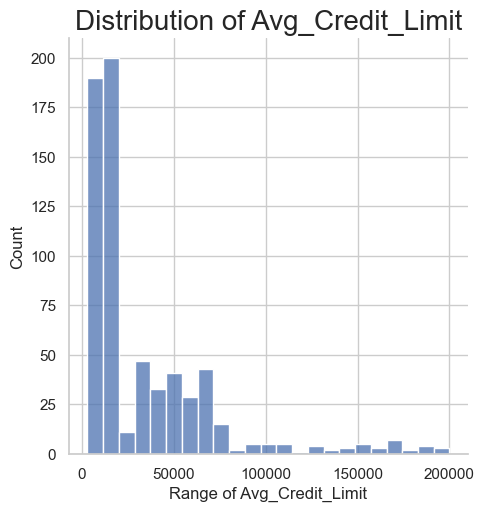

In [11]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Avg_Credit_Limit'])
plt.title('Distribution of Avg_Credit_Limit', fontsize = 20)
plt.xlabel('Range of Avg_Credit_Limit')
plt.ylabel('Count')

From the plot we can see that the data is left side and skewed. 

Text(8.319444444444445, 0.5, 'Count')

<Figure size 1000x600 with 0 Axes>

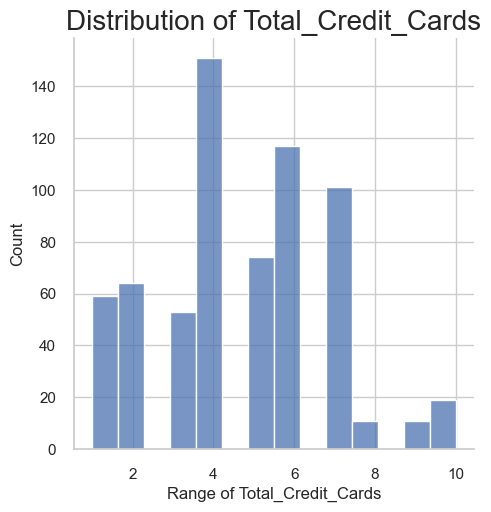

In [62]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.displot(df['Total_Credit_Cards'])
plt.title('Distribution of Total_Credit_Cards', fontsize = 20)
plt.xlabel('Range of Total_Credit_Cards')
plt.ylabel('Count')

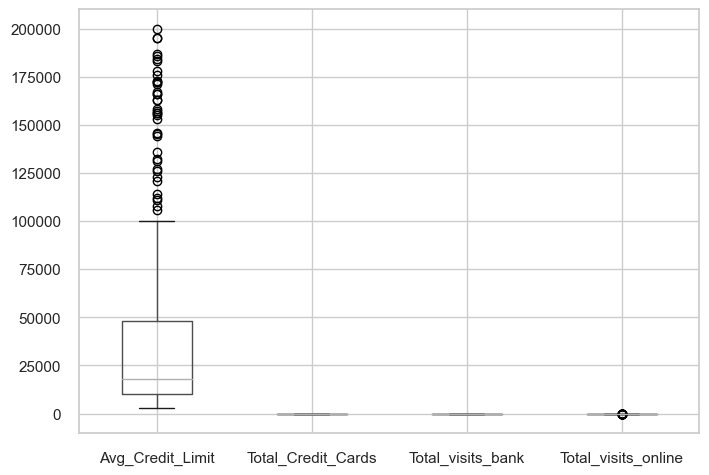

In [63]:
# checking outlier
np.random.seed(1234)
boxplot = df.boxplot(column=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online'])

From the above graphs we can see that the data has outliers in the Avg_Credit_limit and data is positivily skewed. Outliers can be removed using different techniques such as: 

- Trimming: It excludes the outlier values from our analysis. By applying this technique our data becomes thin when there are more outliers present in the dataset. Its main advantage is its fastest nature.

- Capping: In this technique, we cap our outliers data and make the limit i.e, above a particular value or less than that value, all the values will be considered as outliers, and the number of outliers in the dataset gives that capping number.

- Treat outliers as a missing value: By assuming outliers as the missing observations, treat them accordingly. 
- Discretization: In this technique, by making the groups we include the outliers in a particular group and force them to behave in the same manner as those of other points in that group. This technique is also known as Binning.

Since our data is skewed and has outleirs we will use Use Inter-Quartile Range (IQR) proximity rule.

- The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

- where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

#### IQR Baesd Outlier removal

In [14]:
# IQR
Q1 = np.percentile(df['Avg_Credit_Limit'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(df['Avg_Credit_Limit'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1

In [15]:
#Finding the IQR
percentile25 = df['Avg_Credit_Limit'].quantile(0.25)
percentile75 = df['Avg_Credit_Limit'].quantile(0.75)

In [16]:
#Finding upper and lower limit
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [43]:
df[df['Avg_Credit_Limit'] > upper_limit]
df[df['Avg_Credit_Limit'] < lower_limit]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label


In [44]:
#Trimming

new_df = df[df['Avg_Credit_Limit'] < upper_limit]
new_df.shape

(621, 8)

<AxesSubplot: >

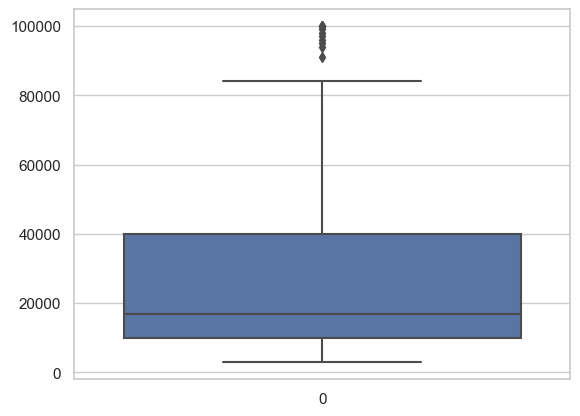

In [19]:
#Form a Box-plot for the skewed feature

sns.boxplot(new_df['Avg_Credit_Limit'])

In [20]:
# capping
new_df_cap = df.copy()
new_df_cap['Avg_Credit_Limit'] = np.where(
    new_df_cap['Avg_Credit_Limit'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Avg_Credit_Limit'] < lower_limit,
        lower_limit,
        new_df_cap['Avg_Credit_Limit']
    )
)

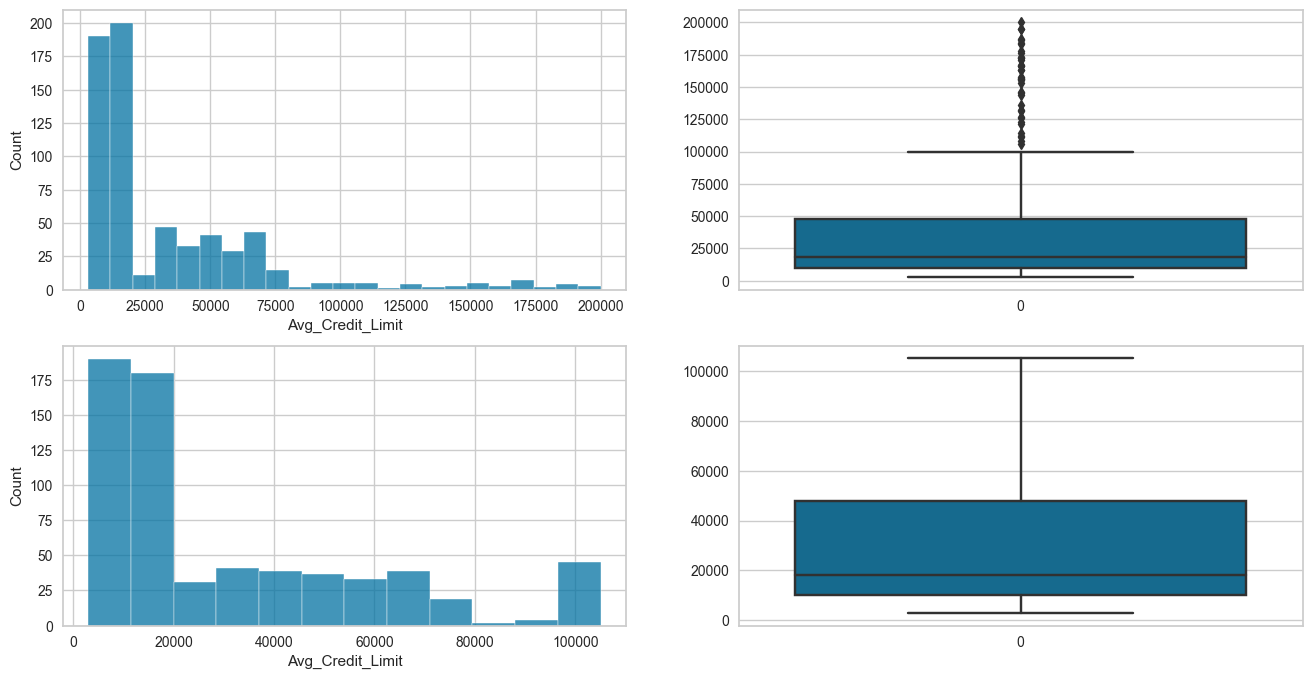

In [45]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['Avg_Credit_Limit'])
plt.subplot(2,2,2)
sns.boxplot(df['Avg_Credit_Limit'])
plt.subplot(2,2,3)
sns.histplot(new_df_cap['Avg_Credit_Limit'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Avg_Credit_Limit'])
plt.show()

In [47]:
### Filtering the average credit limit, total credit cards, total bank visits from the dataset

X = df[['Avg_Credit_Limit', 'Total_visits_bank', 'Total_Credit_Cards']].iloc[:, :].values
X

array([[100000,      1,      2],
       [ 50000,      0,      3],
       [ 50000,      1,      7],
       ...,
       [145000,      1,      8],
       [172000,      1,     10],
       [167000,      0,      9]])

In [48]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)


In [49]:
wcss

[932931366972.9819,
 315872385557.31244,
 93831370176.65411,
 53044223381.83738,
 30884747539.69218,
 23676886980.33699,
 17513852399.26572,
 12571262167.904552,
 9566999820.774885,
 7883776742.382144]

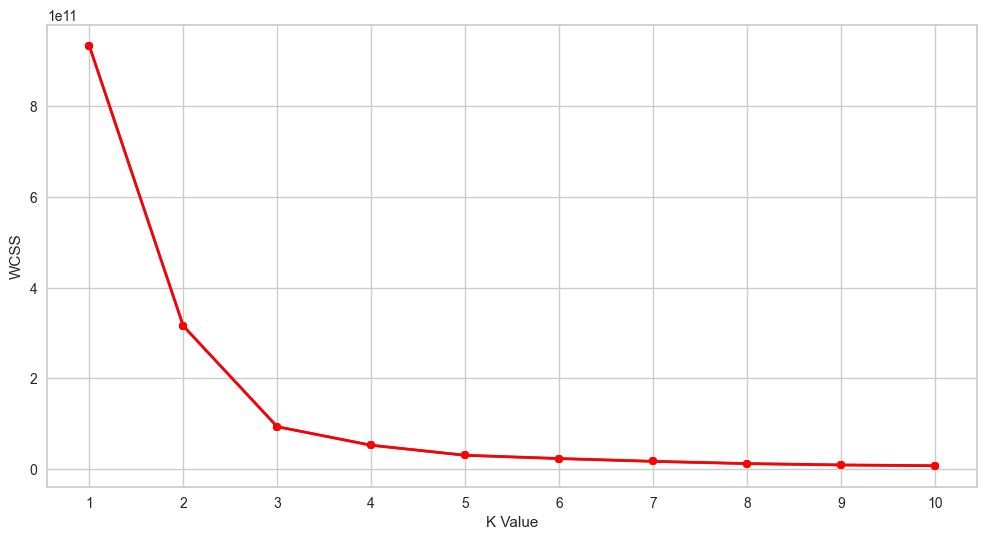

In [50]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

From the elbow curve optimal number of clusters are 3 here.

In [51]:
km = KMeans(n_clusters = 3)
km.fit(X)
y = km.predict(X) 

In [52]:
df['label']=y

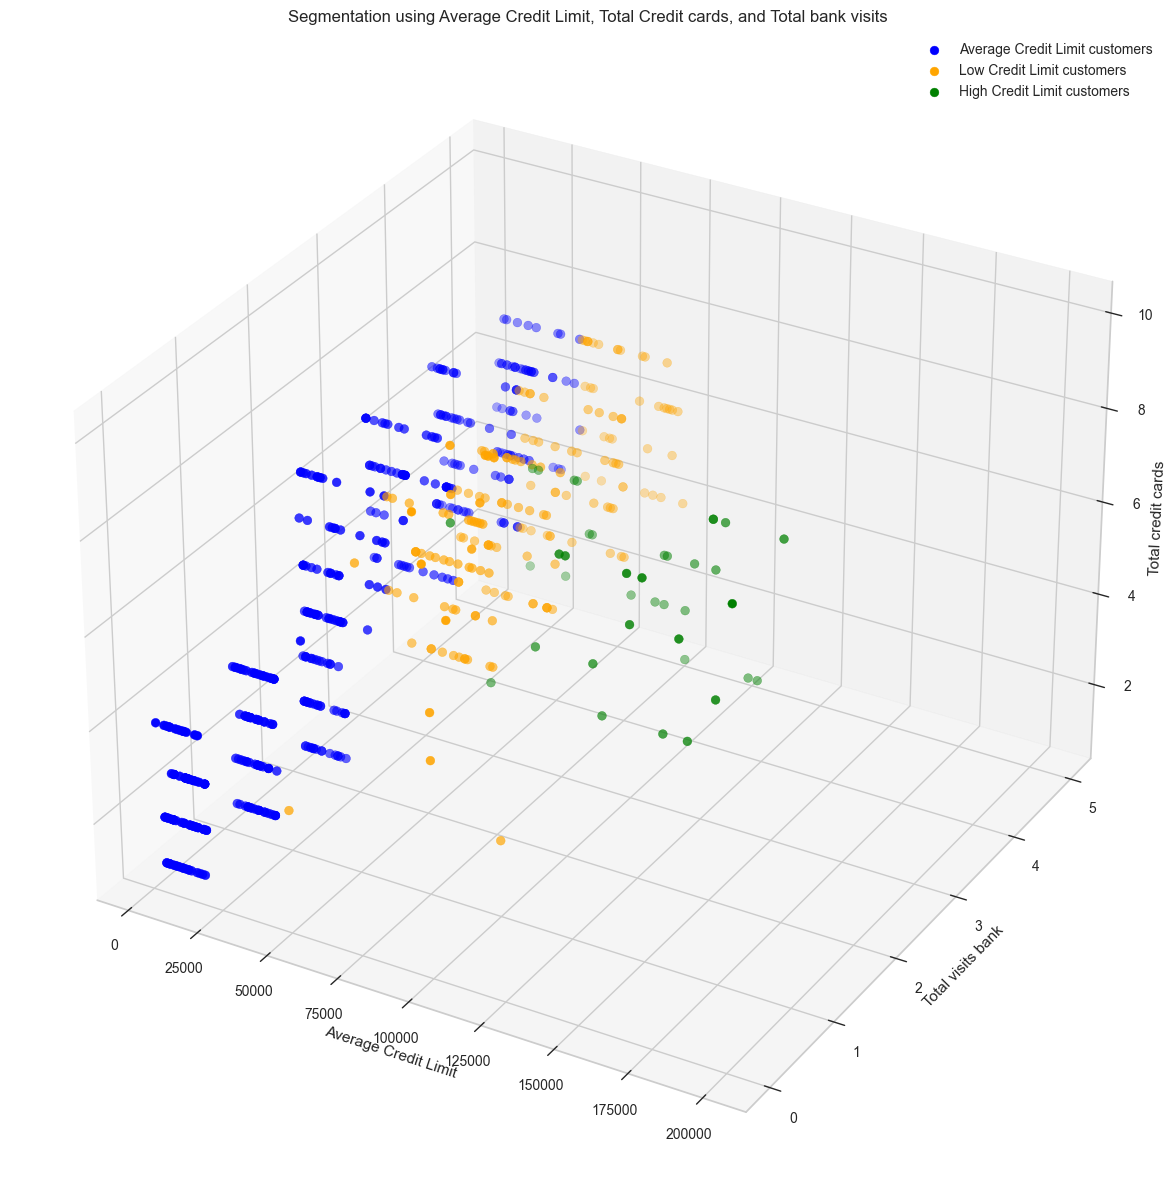

In [53]:
### Visualizing the clusters

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[y == 0, 0], X[y == 0, 1], X[y == 0, 2], s = 40 , color = 'blue', 
           label = "Average Credit Limit customers")
ax.scatter(X[y == 1, 0], X[y == 1, 1], X[y == 1, 2], s = 40 , color = 'orange', 
           label = "Low Credit Limit customers")
ax.scatter(X[y == 2, 0], X[y == 2, 1], X[y == 2, 2], s = 40 , color = 'green', 
           label = "High Credit Limit customers")
plt.title('Segmentation using Average Credit Limit, Total Credit cards, and Total bank visits')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total visits bank')
ax.set_zlabel('Total credit cards')
ax.legend()
plt.show()

From the above graph, we can see that there are 3 clusters.

- Low Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a low credit limit. The customers with few credit cards visit the bank lesser times than those who have more credit cards.
- Average Credit Limit customers: From the above graph, we can see that the customers present in this cluster have an average credit limit. Most of the customers irrespective of the number of credit cards they have go to the bank more number of times.
- High Credit Limit customers: From the above graph, we can see that the customers present in this cluster have a high credit limit. These customers have less than 5 credit cards and visit the bank atleast three times.


# Silhoute score - 

The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. 

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In [54]:
#Calculate Silhoutte Score

score = silhouette_score(X, y, metric='euclidean')

# Print the score

print('Silhouetter Score: %.3f' % score)


Silhouetter Score: 0.717


In [56]:
#!pip install yellowbrick

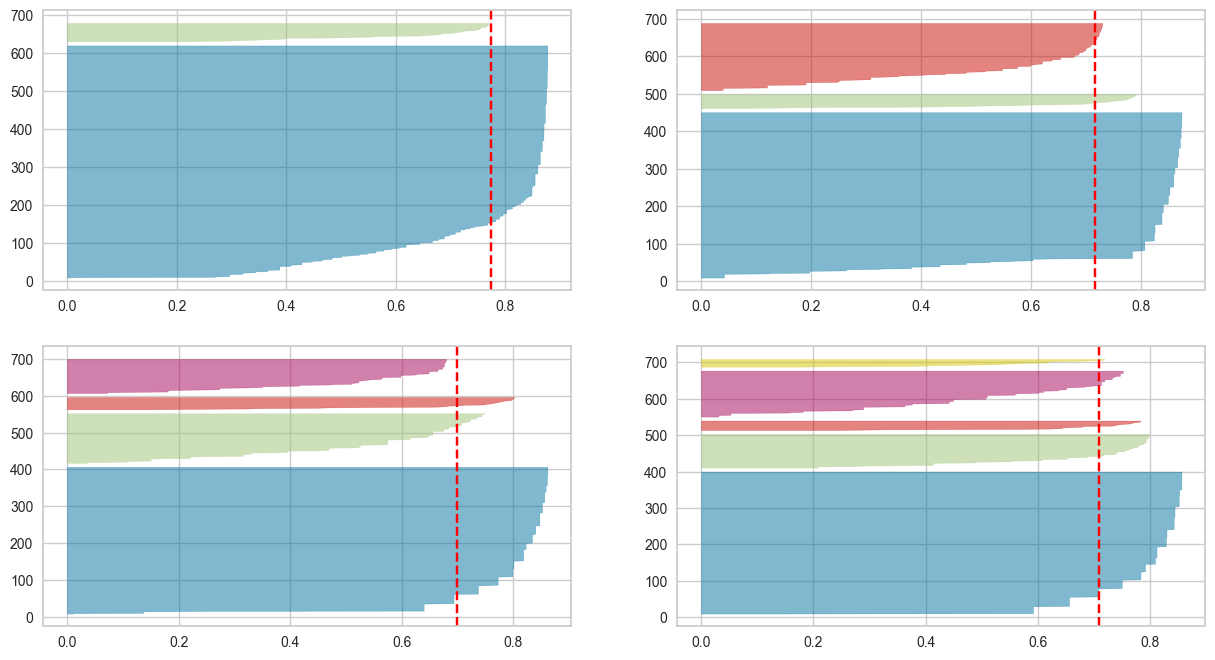

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

From the above charts it shows the value of silhouette score is close to 1 when the cluster is n= 2. So here the number of cluster is valid when we have n= 2. 

In [58]:
# https://www.kaggle.com/code/gadigevishalsai/customer-segmentation-using-clustering-and-rfm

## RFM Analysis
Customer segmentation is a method of dividing customers into groups or clusters on the basis of common characteristics. Recency, Frequency, & Monetary (RFM) is one of the techniques that can be used for customer segmentation and is one of the conventional ways for segmentation that been used for a long time.

- Recency refers to when the customer did the most recent transaction using our product
- Frequency refers to how often customers do transactions using our product
- Monetary Value refers to how much does a customer spend in our product

In [59]:
df.head()


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,label
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


#### Calculating Recency
Here, since there is no specific column to mention the time of the most frequent visit. Let's assume that the data is filtered based on most recent visit. So, let's give an arbitrary value of 10 to recency.

In [34]:
recency_df = pd.DataFrame()
recency_df['Customer Key'] = df['Customer Key']
recency_df['Recency'] = [10] * len(recency_df)

### Dropping the duplicate records

recency_df = recency_df.drop_duplicates(subset = "Customer Key")
recency_df.head()

,Customer Key,Recency
0,87073,10
1,38414,10
2,17341,10
3,40496,10
4,47437,10


#### Calculating Frequency
To calculate the frequency of frequent transactions of the customer in ordering/buying some product from the company. Here, we will use the metric Total_visits_bank + Total_visits_online + Total_calls_made to calculate frequency.

In [35]:
frequency_df = pd.DataFrame()
frequency_df['Customer Key'] = df['Customer Key']
frequency_df['Frequency'] = df['Total_visits_bank'] + df['Total_visits_online'] + df['Total_calls_made']
#frequency_df.columns = ['Customer key', 'Frequency']
frequency_df = frequency_df.drop_duplicates(subset = "Customer Key")
frequency_df.head()

,Customer Key,Frequency
0,87073,2
1,38414,19
2,17341,8
3,40496,6
4,47437,15


### Calculating Monetary
Here we are calculating the monetary value of customer using the column Avg_Credit_Limit.

In [36]:
#Calculating Monetary

monetary_df = pd.DataFrame()
monetary_df['Customer Key'] = df['Customer Key']
monetary_df['Monetary'] = df['Avg_Credit_Limit']

### Dropping the duplicate records

monetary_df = monetary_df.drop_duplicates(subset = "Customer Key")
monetary_df.head()

,Customer Key,Monetary
0,87073,100000
1,38414,50000
2,17341,50000
3,40496,30000
4,47437,100000


#### Merging all three columns in one dataframe
Here we are merging all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [37]:
# Merging all three dataframes into one

rf_df = recency_df.merge(frequency_df, on='Customer Key' )
rfm_df = rf_df.merge(monetary_df, on='Customer Key')
rfm_df.head()


,Customer Key,Recency,Frequency,Monetary
0,87073,10,2,100000
1,38414,10,19,50000
2,17341,10,8,50000
3,40496,10,6,30000
4,47437,10,15,100000


#### Ranking Customer’s based upon their recency, frequency, and monetary score
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [38]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,Customer Key,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,87073,10,2,100000,100.0,0.992366,0.992366
1,38414,10,19,50000,100.0,100.000000,100.000000
2,17341,10,8,50000,100.0,48.091603,48.091603
3,40496,10,6,30000,100.0,24.274809,24.274809
4,47437,10,15,100000,100.0,95.725191,95.725191


### Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. 
- Formula used for calculating rfm score is : 
0.15 * Recency score + 0.28 * Frequency score + 0.57 * Monetary score

In [39]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']

# Scaling the RFM Score to a scale of 5
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)

### Fetching the final data
rfm_df[['Customer Key', 'RFM_Score']].head(7)

,Customer Key,RFM_Score
0,87073,0.79
1,38414,5.00
2,17341,2.79
3,40496,1.78
4,47437,4.82
5,58634,3.24
6,48370,4.43


Rating Customer based upon the RFM score

- rfm score > 4.5 : Top Customer
- 4.5 > rfm score > 4 : High Value Customer
- 4 > rfm score > 3 : Medium value customer
- 3 > rfm score > 1.6 : Low-value customer
- rfm score < 1.6 :Lost Customer

In [65]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] > 4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,
                                        "High value Customer",(np.where(rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['Customer Key', 'RFM_Score', 'Customer_segment']].head(10)

,Customer Key,RFM_Score,Customer_segment
0,87073,0.79,Lost Customers
1,38414,5.00,Top Customers
2,17341,2.79,Low Value Customers
3,40496,1.78,Low Value Customers
4,47437,4.82,Top Customers
5,58634,3.24,Medium Value Customer
6,48370,4.43,High value Customer
7,37376,0.79,Lost Customers
8,82490,1.06,Lost Customers
9,44770,2.79,Low Value Customers


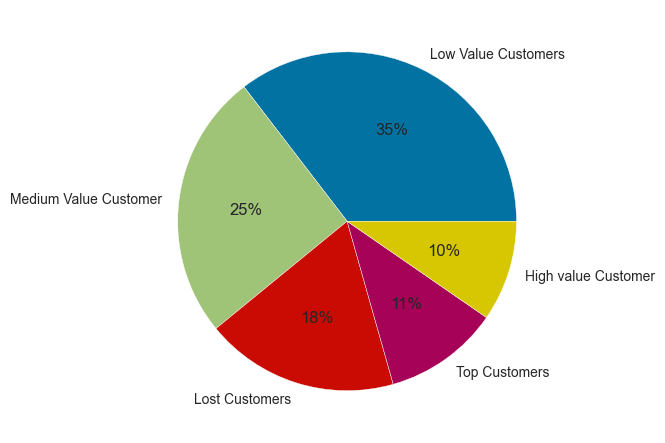

In [41]:
### Visualizing the customer segments

plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Conclusion

Here the K-Means clustering model helps us in better understanding the credit card customer segmentation also to understand the value a customer brings to the organization, we use RFM analysis to segment the data accordingly.

References: - https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/
- https://www.kaggle.com/code/gadigevishalsai/customer-segmentation-using-clustering-and-rfm#6.-RFM-Analysis
    